**Math 345M LAB - Week 1**

In this lab we will be performing a basic analysis of a dataset. We will calculate basic statistical qunatities like mean and standart deviation, along with that we will check for outlier data points using two different methods.

## Participants:

Cole Pendergraft

Elliott Freeman

Arden Butterfield

Zac Cross


In [1]:
# we start by importing the necessary packages



import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Here, we will upload our data from a local machine directly into our colab notebook





In [3]:
filename = 'beer.csv'

path = '~/Downloads/'
df = pd.read_csv(path+filename) 

df = pd.read_csv(filename)



In [4]:
# Here are some basic manipulations that one can do using the panda library

# selects the first 3 rows of the dataset

# selects the last 3 rows of the dataset

# Read Headers

# Read each Column

# Read each Row

# Read a specific location (R,C)


In [5]:
# Selecting specific columns out of the dataset (using the header's name)

percent_alcohol = df['PercentAlcohol']


**Histogram**

First of all we are going to construct a histogram of the data. The purpose of a histogram is to graphically summarize the distribution of a univariate data set. A histogram is a simple graphical repesentation of the data that shows the following information:

*   center (i.e., the location) of the data;
*   spread (i.e., the scale) of the data;
*   skewness of the data;
*   presence of outliers;
*   presence of multiple modes in the data.


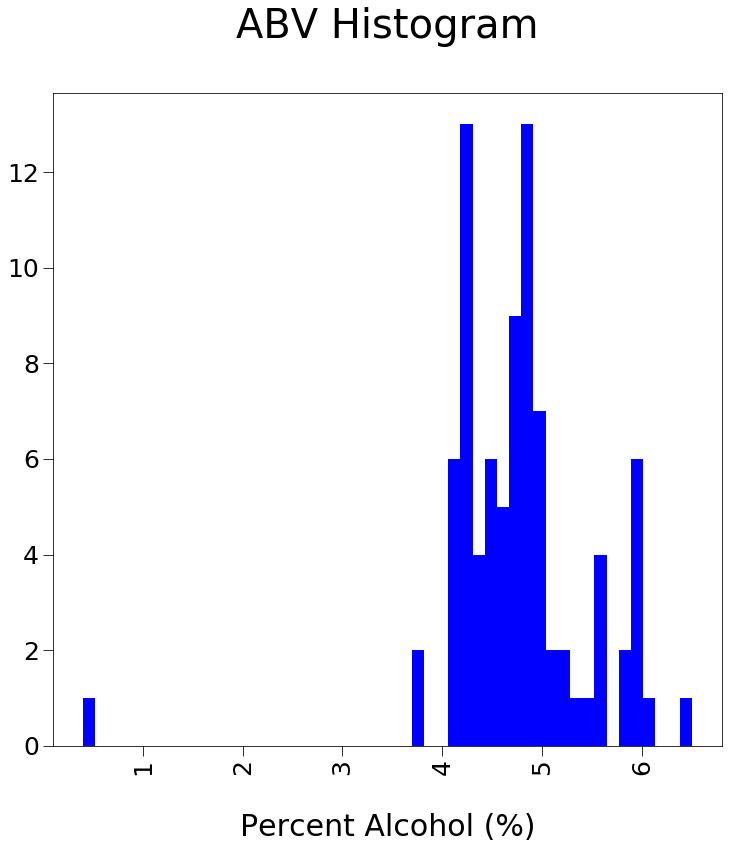

In [6]:
# Here we will plot the Histogram of our data

plt.figure(figsize = (12,12))
plt.hist(percent_alcohol, bins=50, color='b')
# plot histogram

plt.title("ABV Histogram\n", fontsize=40)

plt.xlabel("\nPercent Alcohol (%)", fontsize=30)

plt.tick_params(direction='out', length=10)

plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25, rotation=0)

plt.show()

> **Mean and Standard Deviation**

Given a dataset $X = \{x_1, x_2, ..., x_n\}$, the mean of the dataset is defined as:

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_{i}
$$

while the standart deviation is definied as:

$$
s = \sqrt{\frac{\left( \sum x_i - \bar{x} \right)^2}{n-1} }
$$

> ***Outliers***


Outliers are individual values that fall outside of the overall pattern of a data set. This definition is somewhat vague and subjective, so it is helpful to have a rule to apply when determining whether a data point is truly an outlier.
In order to identify the outliers in a dataset we will consider two methods: the *Emperical Rule* and the *Interquartile Rule*.

> **Empirical Rule**

When dealing with a normal distribution (i.e. Gaussian distrbuiton):

$$
P(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{\frac{(x-\mu)^2}{2\sigma^2}}
$$

*   About $68\%$ of values fall within $1$ standart deviation from the mean $\mu$.
*   About $95\%$ of values fall within $2$ standart deviations from the mean $\mu$.
*   About $99.7\%$ of values fall within $3$ standart deviations from the mean $\mu$.

You can use the rule when you are told your data is normal, nearly normal, or if you have a unimodal distribution (i.e. one with a single peak) that is symmetric. 


# Your goal is to use the *3std Empirical Rule* to identify the outliers in each category.
# Use the "filtered" data to create a new histogram per category
# Present the info about the ouliers
# Describe your observations


In [7]:
good_datas = []
for df, name in [(percent_alcohol, 'Percent Alcohol'),  (calories, 'Calories'), (carbs, 'Carbohydrates')]:

  # finding the mean and standart deviation of the dataset
  print(f"Category: {name}")
  mean = df.mean()
  std = df.std()
  print(f"mean: {mean}, standard deviation: {std}")

  # 3std Empirical Rule
  low_cutoff = mean - 3 * std
  high_cutoff = mean + 3 * std
  outliers = [i for i in df if i > high_cutoff or i < low_cutoff]
  print(f"outliers: {outliers}")

  good_data = [i for i in df if i <= high_cutoff and i >= low_cutoff]
  good_datas.append(good_data)
  print("\n")
  
  # plotting the histogram of data without outliers

  # presenting the outliers

Category: Percent Alcohol
mean: 4.759302325581394, standard deviation: 0.7523106221700063
outliers: [0.4]


Category: Calories
mean: 141.0581395348837, standard deviation: 27.791388700633743
outliers: []


Category: Carbohydrates
mean: 11.067441860465117, standard deviation: 4.230350892426136
outliers: [23.9]




In [8]:
def plot_stuff(data, name):
  plt.figure(figsize = (12,12))
  plt.hist(data, bins=50, color='b')
  # plot histogram

  plt.title("ABV Histogram\n", fontsize=40)

  plt.xlabel(f"\n{name}", fontsize=30)

  plt.tick_params(direction='out', length=10)

  plt.xticks(fontsize=25, rotation=90)
  plt.yticks(fontsize=25, rotation=0)

  plt.show()

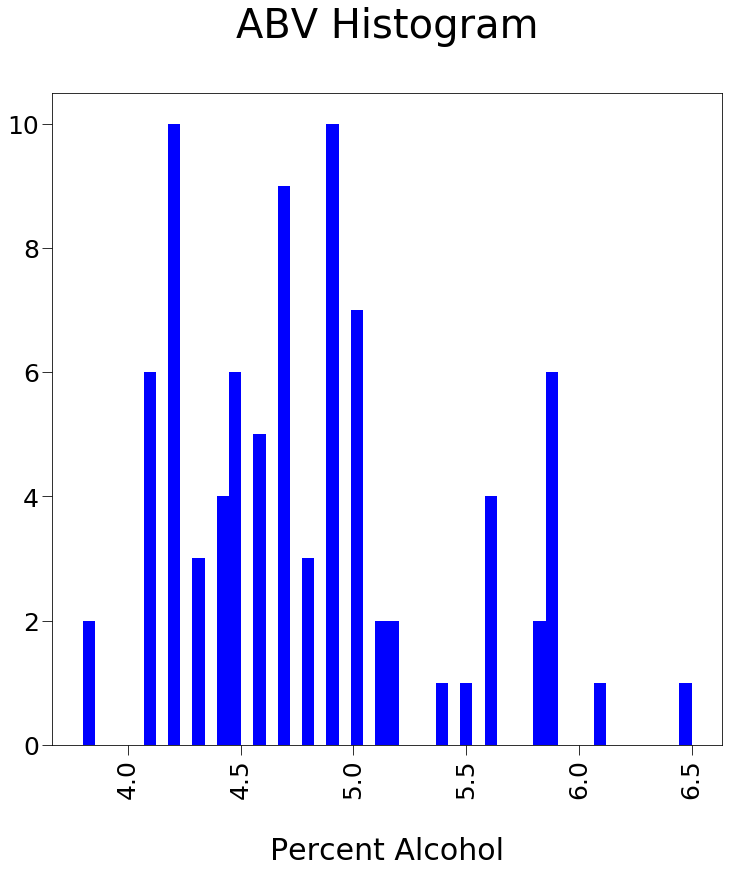

In [9]:
plot_stuff(good_datas[0], "Percent Alcohol")

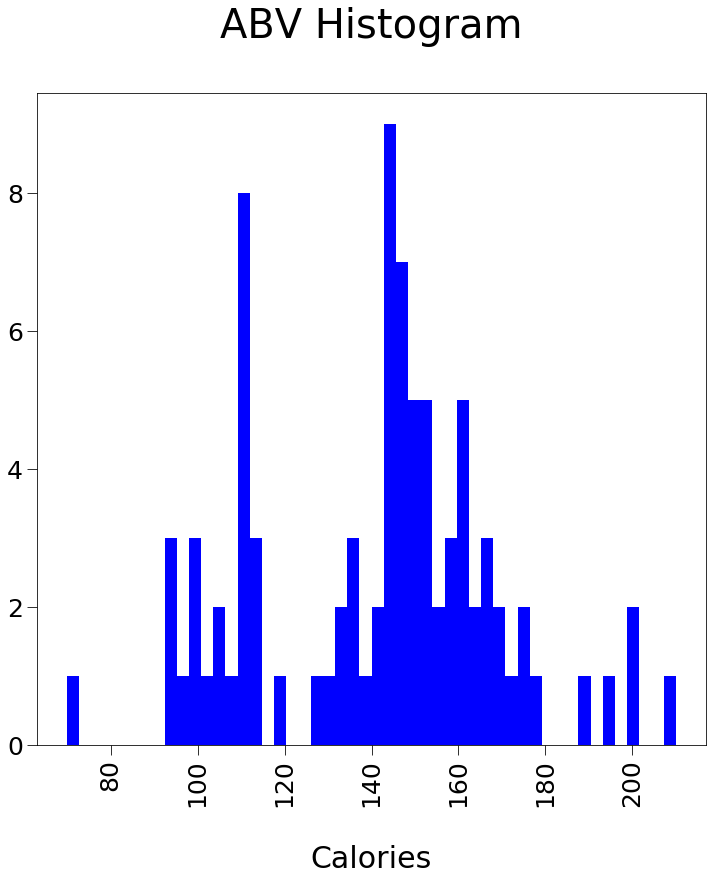

In [10]:

plot_stuff(good_datas[1], "Calories")

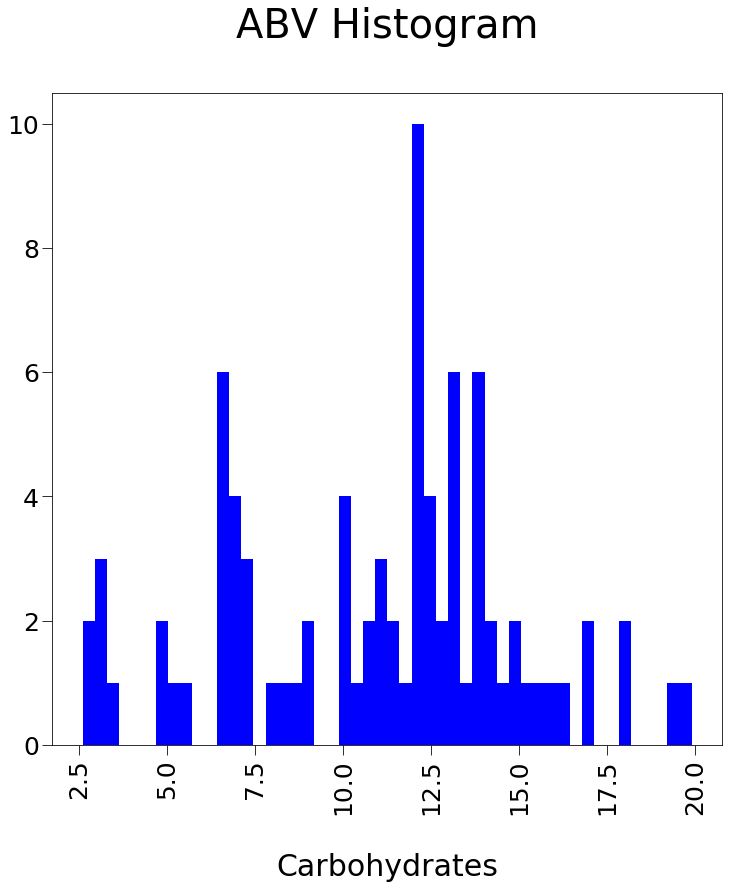

In [11]:

plot_stuff(good_datas[2], "Carbohydrates")

In [12]:
# Observations of this method: 
# As you can see, doing this method cleaned out data to make a more Gaussian shape. It was a pretty "nice" method
# in that it did not cut very much. However, this may be attributed to how spread out data generally is over 50 bins.


>**Interquartile Rule**


Any set of data can be described by its five-number summary. These five numbers, which give you the information you need to find patterns and outliers, consist of (in ascending order):

1) $Q_0$ represents the minimum or lowest value of the dataset.

2) $Q_1$ represents a quarter of the way through the list of all data.

3) $Q_2$ represents the median of the data set, i.e. the midpoint of the whole list of data.

4) $Q_3$ represents three-quarters of the way through the list of all data.

5) $Q_4$ represents the maximum or highest value of the data set.

Another useful quantity in a dataset is the *interquratile range* which is defined as:

$$
IQR = Q_3 - Q_1
$$


**Using the Interquartile Rule to Find Outliers**

Though it's not often affected much by them, the interquartile range can be used to detect outliers. This is done using these steps:

*   Calculate the interquartile range for the data.
*   Multiply the interquartile range ($IQR$) by $1.5$
*   Add $1.5 (IQR)$ to the third quartile. Any number greater than this is a suspected outlier.
*   Subtract $1.5  (IQR)$ from the first quartile. Any number less than this is a suspected outlier.









# Your goal is to use the *Interquartile Rule* to identify the outliers in each category.
# Use the "filtered" data to create a new histogram per category
# Present the info about the ouliers
# Describe your observations

In [13]:
# Interquartile Range Rule

good_datas = []
for df, name in [(percent_alcohol, "Percent Alcohol"), (calories, "Calories"), (carbs, "Carbs")]:

  # finding the mean and standart deviation of the dataset
  print(f"Category: {name}")
  
  iq_range = df.quantile(.75) - df.quantile(.25)
  high_cutoff = df.quantile(.75) + (1.5 * iq_range)
  low_cutoff = df.quantile(.25) - (1.5 * iq_range)
    
  outliers = [i for i in df if i > high_cutoff or i < low_cutoff]
  print(f"outliers: {outliers}")

  good_data = [i for i in df if i <= high_cutoff and i >= low_cutoff]
  good_datas.append(good_data)
  
# plotting the histogram of data without outliers


# Observations:
# These outliers are outside of the IQR. As you can compare to the empirical methods, this method is a bit more harsh.
# In the Percent Alcohol column, we can see that we have 2 more potential outliers, 6.1, 6.5 than from the previous 
# method. Luckily though, both methods agreed on outliers in all 3 categories, with the exception that IQR method 
# Identified additional potential outliers, which is evidence that both methods work to some degree. 

Category: Percent Alcohol
outliers: [6.1, 0.4, 6.5]
Category: Calories
outliers: []
Category: Carbs
outliers: [23.9]


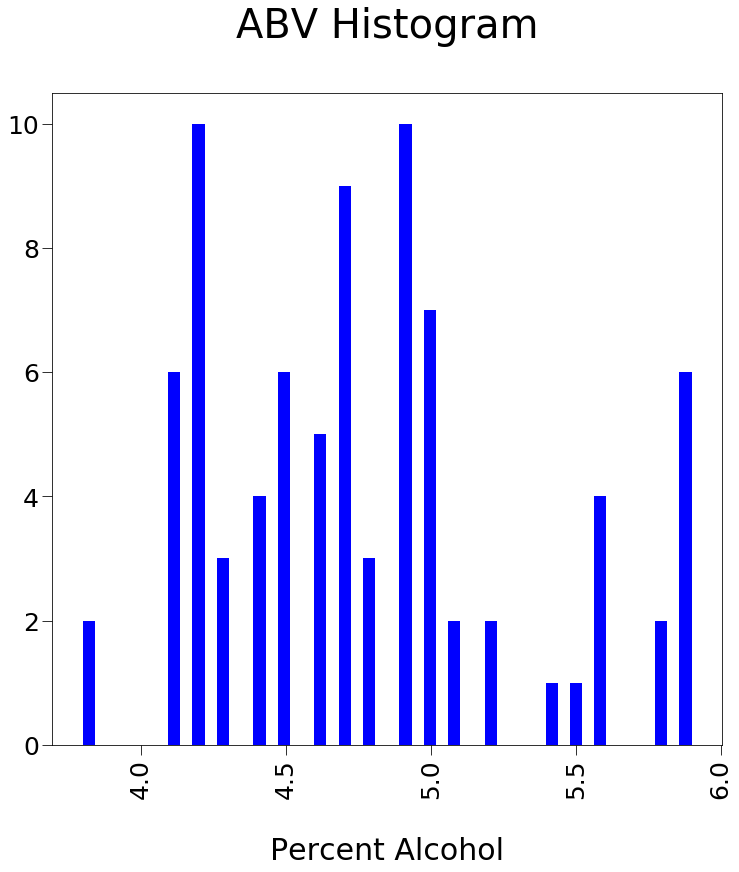

In [14]:
plot_stuff(good_datas[0], "Percent Alcohol")

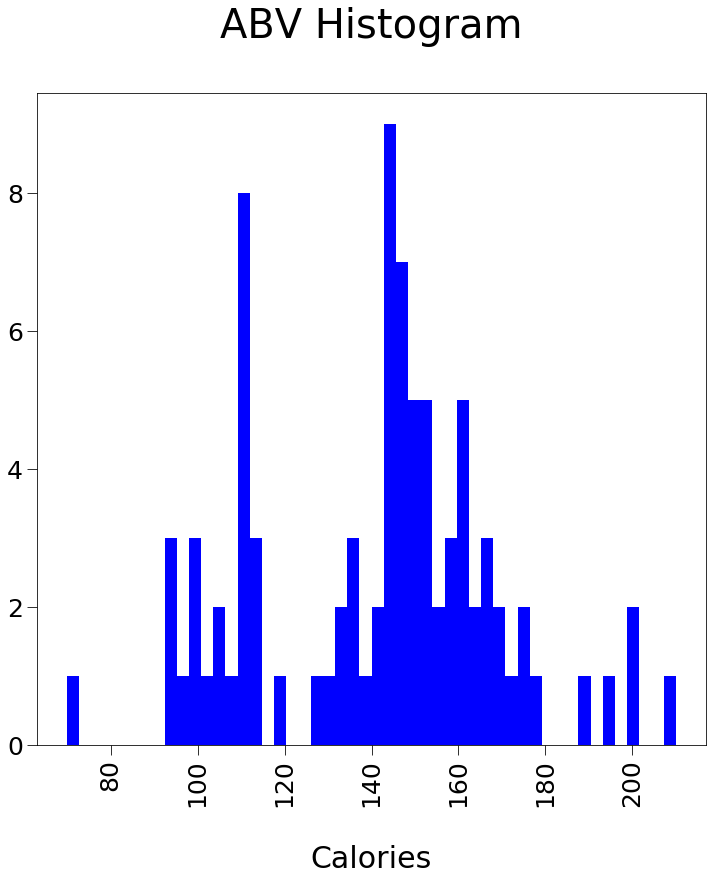

In [15]:
plot_stuff(good_datas[1], "Calories")

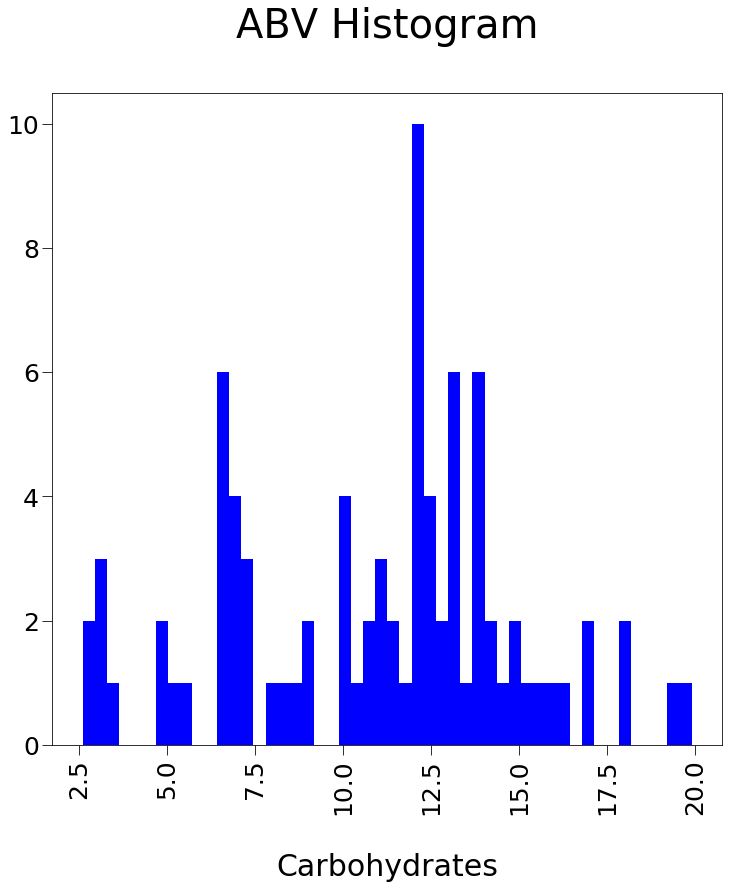

In [16]:
plot_stuff(good_datas[2], "Carbohydrates")

Sources:

https://www.statisticshowto.com/empirical-rule-2/

https://www.statisticshowto.com/how-to-find-a-five-number-summary-in-statistics/

https://www.itl.nist.gov/div898/handbook/eda/section3/histogra.htm